# College Retention Data

In [45]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Phase 1: My question
    How can I build a machine learning model to predict student retainment?
    An independent business metric that we could use to see if this model is successful is 

In [58]:
institution_details = pd.read_csv('../data/cc_institution_details.csv', encoding='latin1')
institution_details = institution_details.drop(
    ['med_sat_value', 'med_sat_percentile', 'long_x', 
     'lat_y', 'site', 'unitid', 'city',
     'nicknames', 'similar'], axis=1)
#institution_details.info()
institution_details.drop(
    columns=institution_details.columns[[1, 9, 10, 12, 13, 14, 16, 17, 19, 21, 23, 25, 27, 29, 31] + list(range(32, 52))], inplace=True
)
institution_details.head()

,chronname,level,control,basic,hbcu,flagship,student_count,awards_per_value,exp_award_value,ft_pct,aid_value,endow_value,grad_100_value,grad_150_value,pell_value,retain_value,ft_fac_value,cohort_size
0,Alabama A&M University,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,4051,14.2,105331,93.8,7142.0,NaN,10.0,29.1,71.2,63.1,82.8,882.0
1,University of Alabama at Birmingham,4-year,Public,Research Universities--very high research acti...,NaN,NaN,11502,20.9,136546,72.7,6088.0,24136.0,29.4,53.5,35.1,80.2,92.4,1376.0
2,Amridge University,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,322,29.9,58414,62.7,2540.0,302.0,0.0,66.7,68.4,37.5,67.2,3.0
3,University of Alabama at Huntsville,4-year,Public,Research Universities--very high research acti...,NaN,NaN,5696,20.9,64418,74.4,6647.0,11502.0,16.5,48.4,32.8,81.0,65.5,759.0
4,Alabama State University,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,5356,11.6,132407,91.0,7256.0,13202.0,8.8,25.2,82.7,62.2,67.0,1351.0


In [75]:
institution_details['hbcu']= [1 if institution_details['hbcu'][i]=='X' else 0 for i in range(len(institution_details['hbcu']))]
institution_details['hbcu'] = institution_details.hbcu.astype('category')
institution_details['flagship']=[1 if institution_details['flagship'][i]=='X' else 0 for i in range(len(institution_details['hbcu']))]
institution_details['flagship'] = institution_details.flagship.astype('category')
institution_details['level'] = institution_details.level.astype('category')
institution_details['control'] = institution_details.control.astype('category')
institution_details['basic'] = institution_details.basic.astype('category')
institution_details.head()

,chronname,level,control,basic,hbcu,flagship,student_count,awards_per_value,exp_award_value,ft_pct,aid_value,endow_value,grad_100_value,grad_150_value,pell_value,retain_value,ft_fac_value,cohort_size
0,Alabama A&M University,4-year,Public,Masters Colleges and Universities--larger prog...,0,0,4051,14.2,105331,93.8,7142.0,NaN,10.0,29.1,71.2,63.1,82.8,882.0
1,University of Alabama at Birmingham,4-year,Public,Research Universities--very high research acti...,0,0,11502,20.9,136546,72.7,6088.0,24136.0,29.4,53.5,35.1,80.2,92.4,1376.0
2,Amridge University,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,0,0,322,29.9,58414,62.7,2540.0,302.0,0.0,66.7,68.4,37.5,67.2,3.0
3,University of Alabama at Huntsville,4-year,Public,Research Universities--very high research acti...,0,0,5696,20.9,64418,74.4,6647.0,11502.0,16.5,48.4,32.8,81.0,65.5,759.0
4,Alabama State University,4-year,Public,Masters Colleges and Universities--larger prog...,0,0,5356,11.6,132407,91.0,7256.0,13202.0,8.8,25.2,82.7,62.2,67.0,1351.0


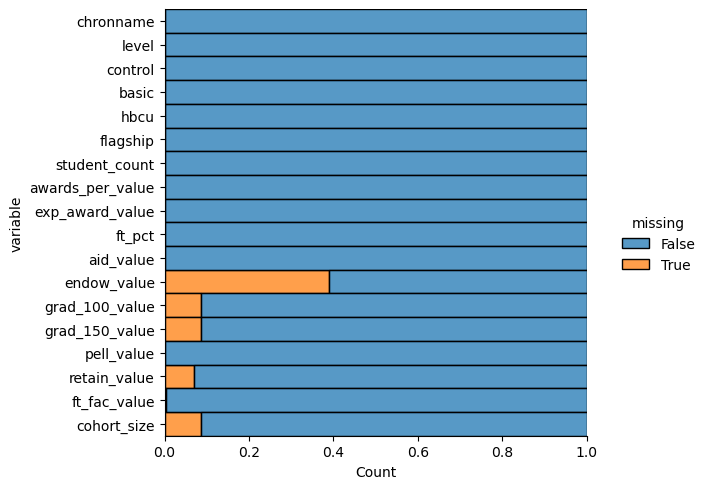

In [83]:
import seaborn as sns
sns.displot(
    data=institution_details.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

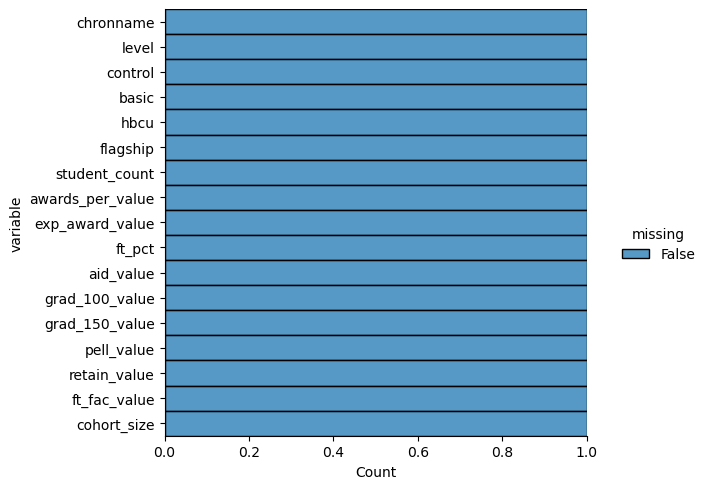

In [82]:
institution_details2 = institution_details.drop(['endow_value'], axis=1)
institution_details2.dropna(axis = 0, how = 'any', inplace = True)
sns.displot(
    data=institution_details2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [86]:
retainment_standardizing = StandardScaler().fit_transform(institution_details2[['retain_value']])
retainment_standardizing[:10]

array([[-0.22508225],
       [ 0.84412891],
       [-1.82577264],
       [ 0.89415049],
       [-0.28135652],
       [ 1.2693123 ],
       [-1.50063241],
       [-0.21882955],
       [ 1.42562972],
       [ 0.85663431]])

In [87]:
retainment_normalizing = MinMaxScaler().fit_transform(institution_details2[['retain_value']])
retainment_normalizing[:10]

array([[0.631],
       [0.802],
       [0.375],
       [0.81 ],
       [0.622],
       [0.87 ],
       [0.427],
       [0.632],
       [0.895],
       [0.804]])

<Axes: ylabel='Density'>

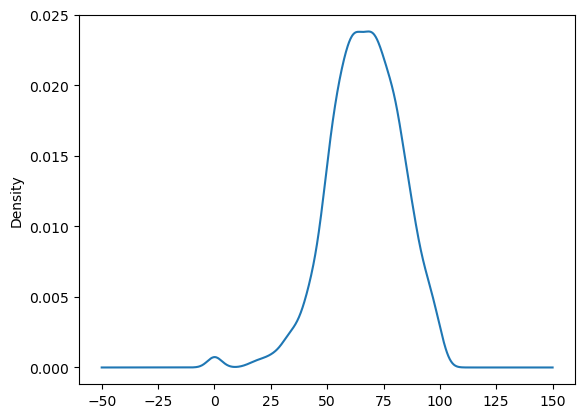

In [88]:
institution_details2.retain_value.plot.density()

<Axes: ylabel='Density'>

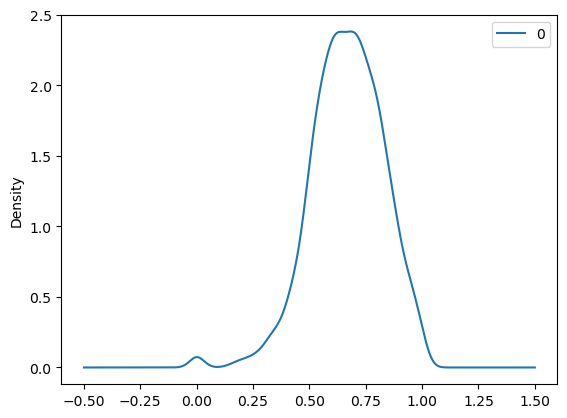

In [89]:
pd.DataFrame(retainment_normalizing).plot.density()

In [90]:
numbers_listing = list(institution_details2.select_dtypes('number')) #select function to find the numeric variables and create a list  

institution_details2[numbers_listing] = MinMaxScaler().fit_transform(institution_details2[numbers_listing])
institution_details2

,chronname,level,control,basic,hbcu,flagship,student_count,awards_per_value,exp_award_value,ft_pct,aid_value,grad_100_value,grad_150_value,pell_value,retain_value,ft_fac_value,cohort_size
0,Alabama A&M University,4-year,Public,Masters Colleges and Universities--larger prog...,0,0,0.023677,0.104900,0.019941,0.935551,0.165867,0.100,0.291,0.712,0.631,0.828,0.054289
1,University of Alabama at Birmingham,4-year,Public,Research Universities--very high research acti...,0,0,0.067476,0.156202,0.025851,0.716216,0.140338,0.294,0.535,0.351,0.802,0.924,0.084730
2,Amridge University,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,0,0,0.001758,0.225115,0.011059,0.612266,0.054401,0.000,0.667,0.684,0.375,0.672,0.000123
3,University of Alabama at Huntsville,4-year,Public,Research Universities--very high research acti...,0,0,0.033347,0.156202,0.012196,0.733888,0.153878,0.165,0.484,0.328,0.810,0.655,0.046709
4,Alabama State University,4-year,Public,Masters Colleges and Universities--larger prog...,0,0,0.031348,0.084992,0.025067,0.906445,0.168629,0.088,0.252,0.827,0.622,0.670,0.083190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,Keweenaw Bay Ojibwa Community College,2-year,Public,Tribal Colleges,0,0,0.000488,0.054364,0.023993,0.588358,0.106961,0.000,0.000,0.744,0.333,0.286,0.000185
3793,Grace College of Divinity,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,0,0,0.000511,0.196784,0.004553,0.319127,0.110594,0.000,0.000,0.263,0.333,0.107,0.000678
3794,John Paul the Great Catholic University,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,0,0,0.000688,0.123277,0.020061,0.917879,0.220438,0.515,0.515,0.283,0.744,0.444,0.001972
3795,Chamberlain College of Nursing-Missouri,4-year,Private for-profit,Not applicable- not in Carnegie universe,0,0,0.002733,0.418070,0.010022,0.553015,0.072591,0.375,0.375,0.531,0.778,0.296,0.000431


In [91]:
category_list = list(institution_details2.select_dtypes('category'))
retainment_one_hot = pd.get_dummies(institution_details2, columns = category_list) 
retainment_one_hot

,chronname,student_count,awards_per_value,exp_award_value,ft_pct,aid_value,grad_100_value,grad_150_value,pell_value,retain_value,...,basic_Research Universities--high research activity,basic_Research Universities--very high research activity,basic_Schools of art- music- and design,basic_Schools of business and management,basic_Schools of engineering,basic_Schools of law,basic_Theological seminaries- Bible colleges- and other faith-related institutions,basic_Tribal Colleges,hbcu_0,flagship_0
0,Alabama A&M University,0.023677,0.104900,0.019941,0.935551,0.165867,0.100,0.291,0.712,0.631,...,False,False,False,False,False,False,False,False,True,True
1,University of Alabama at Birmingham,0.067476,0.156202,0.025851,0.716216,0.140338,0.294,0.535,0.351,0.802,...,False,True,False,False,False,False,False,False,True,True
2,Amridge University,0.001758,0.225115,0.011059,0.612266,0.054401,0.000,0.667,0.684,0.375,...,False,False,False,False,False,False,False,False,True,True
3,University of Alabama at Huntsville,0.033347,0.156202,0.012196,0.733888,0.153878,0.165,0.484,0.328,0.810,...,False,True,False,False,False,False,False,False,True,True
4,Alabama State University,0.031348,0.084992,0.025067,0.906445,0.168629,0.088,0.252,0.827,0.622,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,Keweenaw Bay Ojibwa Community College,0.000488,0.054364,0.023993,0.588358,0.106961,0.000,0.000,0.744,0.333,...,False,False,False,False,False,False,False,True,True,True
3793,Grace College of Divinity,0.000511,0.196784,0.004553,0.319127,0.110594,0.000,0.000,0.263,0.333,...,False,False,False,False,False,False,False,False,True,True
3794,John Paul the Great Catholic University,0.000688,0.123277,0.020061,0.917879,0.220438,0.515,0.515,0.283,0.744,...,False,False,False,False,False,False,False,False,True,True
3795,Chamberlain College of Nursing-Missouri,0.002733,0.418070,0.010022,0.553015,0.072591,0.375,0.375,0.531,0.778,...,False,False,False,False,False,False,False,False,True,True


count    3371.000000
mean        0.666998
std         0.159955
min         0.000000
25%         0.564000
50%         0.671000
75%         0.781000
max         1.000000
Name: retain_value, dtype: float64

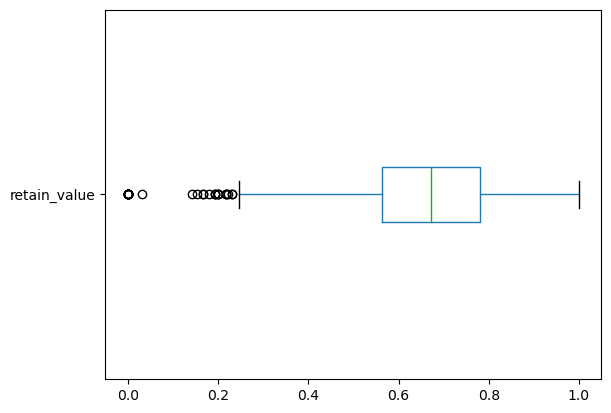

In [93]:
retainment_one_hot.boxplot(column= 'retain_value', vert= False, grid=False)
retainment_one_hot.retain_value.describe()

In [107]:
retainment_one_hot['retain_value_f'] = pd.cut(retainment_one_hot.retain_value, bins = [-1,0.781,1], labels =[0,1])
prevalence = retainment_one_hot.retain_value_f.value_counts()[1]/len(retainment_one_hot.retain_value_f)
prevalence

0.2491842183328389

In [108]:
new_retainment = retainment_one_hot.drop(['chronname','retain_value'],axis=1)

In [109]:
Train, Test = train_test_split(new_retainment,  train_size = 55, stratify = new_retainment.retain_value_f)
print(Train.shape)
print(Test.shape) 

(55, 51)
(3316, 51)


In [110]:
Tune, Test = train_test_split(Test,  train_size = .5, stratify= Test.retain_value_f)
print(Train.retain_value_f.value_counts())
print(14/(14+41))

retain_value_f
0    41
1    14
Name: count, dtype: int64
0.2545454545454545


In [112]:
print(Tune.retain_value_f.value_counts())
print(104/(310+104))

retain_value_f
0    1245
1     413
Name: count, dtype: int64
0.25120772946859904


In [113]:
print(Test.retain_value_f.value_counts())
print(105/(310+105))

retain_value_f
0    1245
1     413
Name: count, dtype: int64
0.25301204819277107
